In [1]:
import numpy as np

In [3]:
data = np.load(r"D:\InterviewExercises\data\mnist.npz")
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# chuẩn hóa
x_train = x_train / 255.0
x_test = x_test / 255.0

# in ra kích thước
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
# Chuyển đổi dữ liệu từ 2D (28x28) thành 1D (784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# in ra kích thước
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


## KNN

In [16]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [17]:
# Mô hình KNN
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Tính khoảng cách từ x tới tất cả các điểm trong X_train
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Lấy k láng giềng gần nhất
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Lấy nhãn phổ biến nhất
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [32]:
# Khởi tạo và huấn luyện mô hình KNN
k = 3
knn = KNN(k=k)
knn.fit(x_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = knn.predict(x_test[0:1000])

# Tính độ chính xác
accuracy = np.sum(predictions == y_test[0:1000]) / len(y_test[0:1000])
print(f'Dộ chính xác của mô hình KNN là: {accuracy:.4f}')

Dộ chính xác của mô hình KNN là: 0.9620


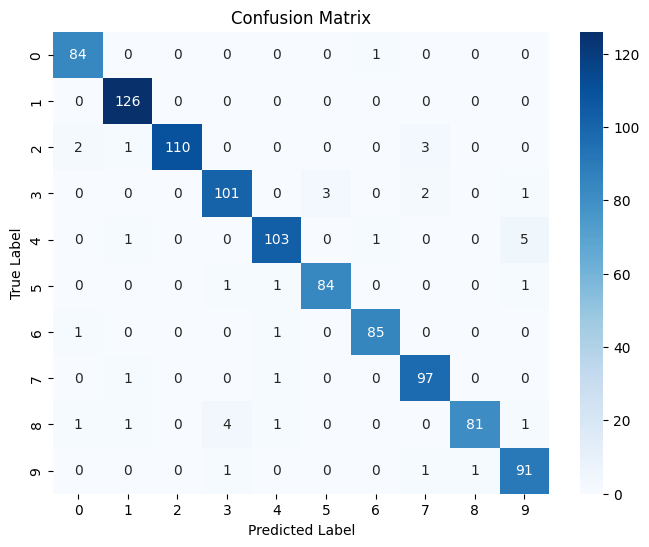

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.97      1.00      0.98       126
           2       1.00      0.95      0.97       116
           3       0.94      0.94      0.94       107
           4       0.96      0.94      0.95       110
           5       0.97      0.97      0.97        87
           6       0.98      0.98      0.98        87
           7       0.94      0.98      0.96        99
           8       0.99      0.91      0.95        89
           9       0.92      0.97      0.94        94

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test[0:1000], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(10)], 
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tính toán báo cáo phân loại
report = classification_report(y_test[0:1000], predictions)
print("Classification Report:")
print(report)

### Độ chính xác của thuật toán KNN rất cao,nhưng với cái giá phải trả là gì ?
- KNN được mô tả là một "lazy learner" (người học lười biếng), có nghĩa là nó không thực hiện bất kỳ quá trình huấn luyện nặng nề nào trên dữ liệu. Thay vào đó, KNN chỉ ghi nhớ dữ liệu huấn luyện mà không cần phải điều chỉnh các tham số hay trọng số (weights).
- Thực tế, nó thực hiện tất cả công việc trong quá trình dự đoán. Độ phức tạp của nó là bậc O(n⋅m⋅d), trong đó n là kích thước của dữ liệu huấn luyện, m là kích thước của dữ liệu kiểm tra, và d là số lượng phép toán cần thực hiện cho mỗi lần kiểm tra.
- Do chi phí tính toán lớn, quá trình dự đoán của KNN có thể mất thời gian dài
### Có thể cái tiến thêm về thuật toán hay không ?
- K-NN with non-linear deformation (IDM): Tỷ lệ lỗi của phương pháp này là 0.54%, theo nghiên cứu của Keysers và cộng sự (IEEE PAMI 2007).
- K-NN with non-linear deformation (P2DHMDM): Tỷ lệ lỗi của phương pháp này là 0.52%, cũng theo nghiên cứu của Keysers và cộng sự (IEEE PAMI 2007).